# Data Science Project: Animal Shelter Adoption Prediction and Analysis

## Project Description

In this data science project, we aim to provide valuable insights to a client managing an animal shelter. Our goal is to develop a model that predicts the likelihood of an animal being adopted, while also gaining a deeper understanding of the factors that influence adoption rates. Through data analysis and visualization, we will explore relationships between various features and outcomes, helping the client make informed decisions about animal donations and improve the overall adoption process.

## Problem Statement
The client operates an animal shelter and is interested in understanding which animals are more likely to be adopted and the underlying reasons for successful adoptions. They have provided a dataset containing information about animal intakes and outcomes, including details such as age, breed, color, intake conditions, and outcome types. Our task is two-fold:

**A.** Adoption Prediction Model: Develop a model that predicts the likelihood of an animal being adopted based on the available features. Explain the model's decision-making process and provide recommendations to enhance the reliability of predictions.

**B.** Web-Based Solution: Create a solution that retrieves data from a webpage, applies the adoption prediction model, and returns recommendations about whether to accept or reject an animal donation based on the likelihood of adoption.

## Column Details

The dataset **"aac_intakes_outcomes.csv"** contains the following columns with their respective data types:

`age_upon_outcome:` **String (object)** - Age of the animal upon outcome in human-readable format (e.g., "3 years", "6 months").

`animal_id_outcome:` **String (object)** - Unique identifier for the animal upon outcome.

`date_of_birth:` **String (object)** - Date of birth of the animal.

`outcome_subtype:` **String (object)** - Additional information about the outcome, providing more context to the outcome type.

`outcome_type:` **String (object)** - Outcome of the animal (e.g., adopted, transferred, returned to owner, etc.).

`sex_upon_outcome:` **String (object)** - Sex of the animal upon outcome (e.g., "Spayed Female", "Neutered Male", "Intact Male").

`age_upon_outcome_(days):` **Integer (int64)** - Age of the animal upon outcome in days.

`age_upon_outcome_(years):` **Float (float64)** - Age of the animal upon outcome in years.

`age_upon_outcome_age_group:` **String (object)** - Age group of the animal upon outcome, categorized for analysis.

`outcome_datetime:` **String (object)** - Date and time of the outcome event.

`outcome_month:` **Integer (int64)** - Month of the outcome event.

`outcome_year:` **Integer (int64)** - Year of the outcome event.

`outcome_monthyear:` **String (object)** - Combination of month and year of the outcome event.

`outcome_weekday:` **String (object)** - Day of the week of the outcome event.

`outcome_hour:` **Integer (int64)** - Hour of the day of the outcome event.

`outcome_number:` **Float (float64)** - Number representing the outcome sequence for an individual animal.

`dob_year:` **Integer (int64)** - Year of birth of the animal.

`dob_month:` **Integer (int64)** - Month of birth of the animal.

`dob_monthyear:` **String (object)** - Combination of month and year of birth of the animal.

`age_upon_intake:` **String (object)** - Age of the animal upon intake in human-readable format.

`animal_id_intake:` **String (object)** - Unique identifier for the animal upon intake.

`animal_type:` **String (object)** - Type of animal (e.g., "Dog", "Cat", "Bird").

`breed:` **String (object)** - Breed of the animal.

`color:` **String (object)** - Color of the animal's fur.

`found_location:` **String (object)** - Location where the animal was found.

`intake_condition:` **String (object)** - Condition of the animal upon intake (e.g., "Normal", "Injured", "Sick").

`intake_type:` **String (object)** - Circumstances under which the animal was taken into the shelter (e.g., "Stray", "Owner Surrender", "Public Assist").

`sex_upon_intake:` **String (object)** - Sex of the animal upon intake.

`count:` Integer **(int64)** - Number of similar animals involved in the outcome.

`age_upon_intake_(days):` **Integer (int64)** - Age of the animal upon intake in days.

`age_upon_intake_(years):` **Float (float64)** - Age of the animal upon intake in years.

`age_upon_intake_age_group:` **String (object)** - Age group of the animal upon intake, categorized for analysis.

`intake_datetime:` **String (object)** - Date and time of the intake event.

`intake_month:` **Integer (int64)** - Month of the intake event.

`intake_year:` **Integer (int64)** - Year of the intake event.

`intake_monthyear:` **String (object)** - Combination of month and year of the intake event.

`intake_weekday:` **String (object)** - Day of the week of the intake event.

`intake_hour:` **Integer (int64)** - Hour of the day of the intake event.

`intake_number:` **Float (float64)** - Number representing the intake sequence for an individual animal.

`time_in_shelter:` **String (object)** - Total time spent in the shelter in human-readable format.

`time_in_shelter_days:` **Float (float64)** - Total time spent in the shelter in days.

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Load the dataset
file_path = 'aac_intakes_outcomes.csv'
data = pd.read_csv(file_path)

In [96]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
data.head()


First Few Rows:


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [92]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekd

In [93]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
data.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age_upon_outcome_(days),79672.0,782.046127,1058.528519,0.0,90.000000,365.000000,1095.000000,9125.000000
age_upon_outcome_(years),79672.0,2.142592,2.900078,0.0,0.246575,1.000000,3.000000,25.000000
outcome_month,79672.0,6.655425,3.414284,1.0,4.000000,7.000000,10.000000,12.000000
outcome_year,79672.0,2015.472563,1.305944,2013.0,2014.000000,2015.000000,2017.000000,2018.000000
outcome_hour,79672.0,14.297306,3.774317,0.0,12.000000,15.000000,17.000000,23.000000
outcome_number,79672.0,1.126820,0.456057,1.0,1.000000,1.000000,1.000000,13.000000
dob_year,79672.0,2013.254870,3.216517,1991.0,2012.000000,2014.000000,2015.000000,2018.000000
dob_month,79672.0,6.310310,3.289077,1.0,4.000000,6.000000,9.000000,12.000000
count,79672.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
age_upon_intake_(days),79672.0,769.341701,1056.009040,0.0,60.000000,365.000000,1095.000000,9125.000000


In [94]:
# Count of missing values in each column
print("\nMissing Value Counts:")
print(data.isnull().sum())


Missing Value Counts:
age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_u

### There are some missing values in the dataset.
 - `outcome_subtype` has more than 50% missing values so it won't be a useful features.

In [99]:
# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

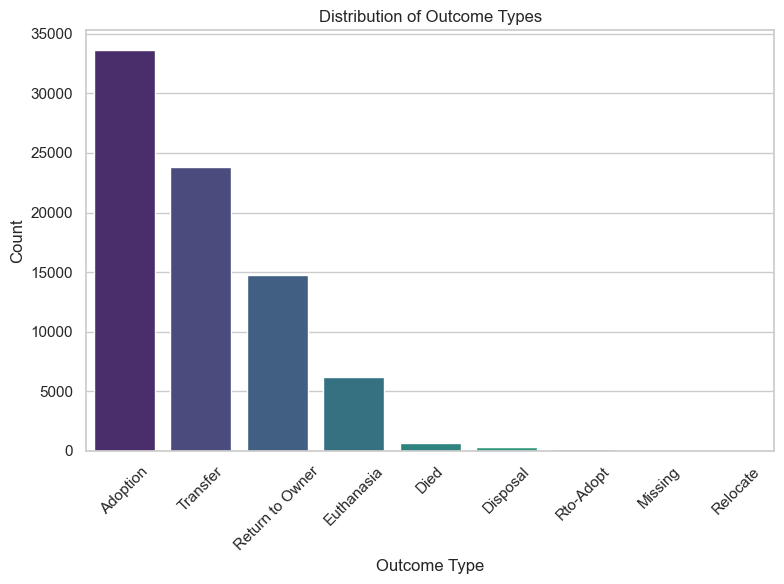

In [100]:
# 1. Distribution of outcome types
plt.figure(figsize=(8, 6))
outcome_distribution = data['outcome_type'].value_counts()
sns.barplot(x=outcome_distribution.index, y=outcome_distribution.values, palette="viridis")
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

### Data is highly impbalanced. Most animals fall under the below category.
- Adoption
- Transfer
- Return to Owner
- Euthanasis

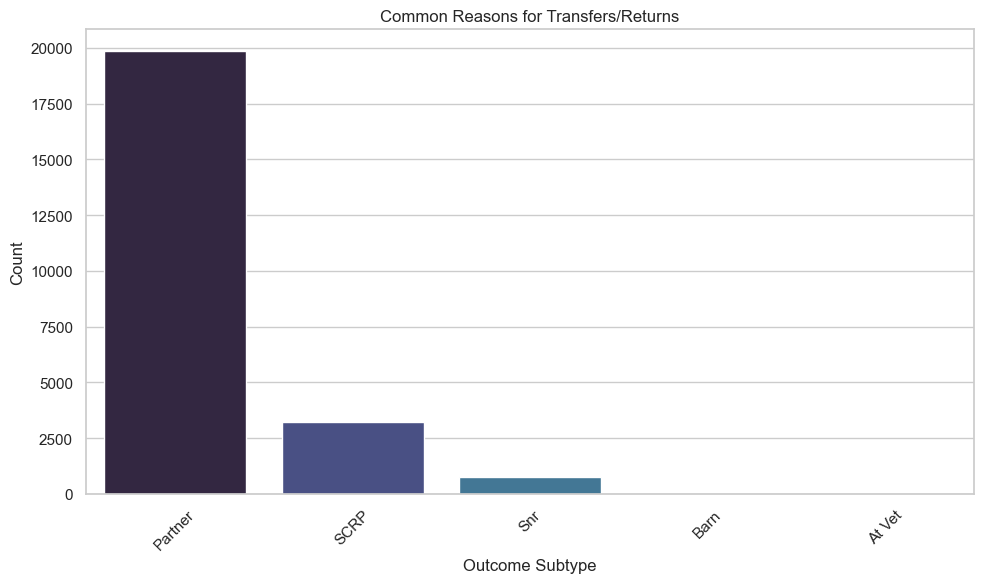

In [101]:
# 2. Common reasons for transfers/returns
plt.figure(figsize=(10, 6))
transfer_reasons = data[data['outcome_type'].isin(['Transfer', 'Return to Owner'])]['outcome_subtype'].value_counts().head(10)
sns.barplot(x=transfer_reasons.index, y=transfer_reasons.values, palette="mako")
plt.title('Common Reasons for Transfers/Returns')
plt.xlabel('Outcome Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

### Intrestingly the reason for animal transfer is Partner but as previously highlighted the data has 50% missing values so this information is not reliable.

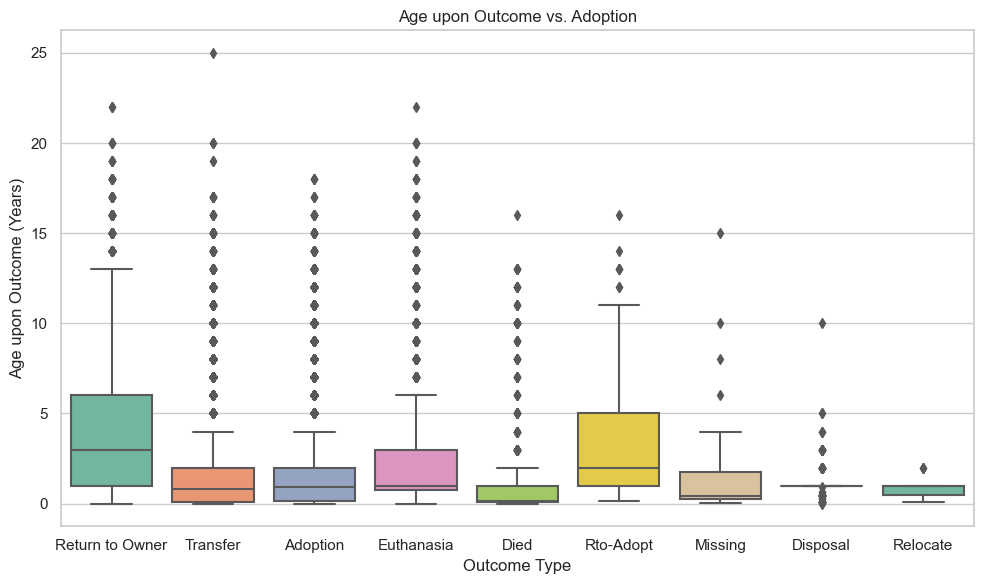

In [102]:
# 3. Relationship between age upon outcome and adoption
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome_type', y='age_upon_outcome_(years)', data=data, palette="Set2")
plt.title('Age upon Outcome vs. Adoption')
plt.xlabel('Outcome Type')
plt.ylabel('Age upon Outcome (Years)')
plt.tight_layout()

### It is important to know that mose animals fall under similar age except few outliers. 
- It can be a great predictor for model.

<Figure size 1000x1000 with 0 Axes>

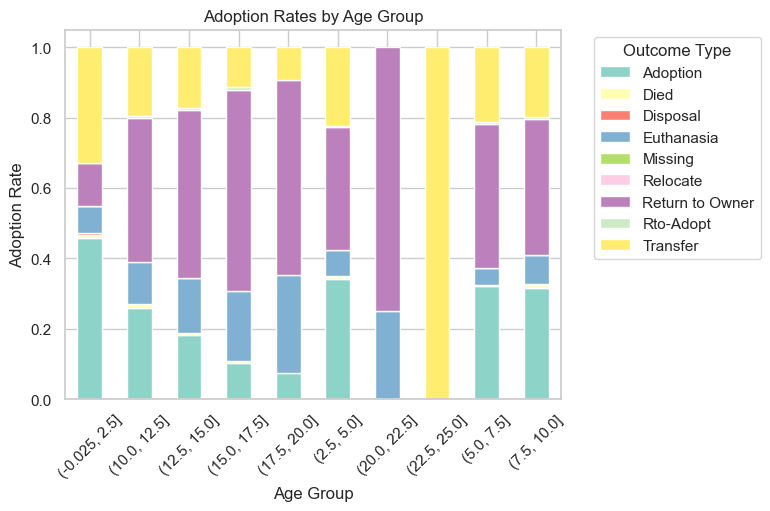

In [184]:
# 4. Adoption rates by age group
plt.figure(figsize=(10, 10))
adoption_by_age_group = data.groupby('age_upon_outcome_age_group')['outcome_type'].value_counts(normalize=True).unstack()
ax = adoption_by_age_group.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Adoption Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


### Age group of animals shows different adoption behaviour. 
- intrestingly, animal with lesser age group and higher age group have higher adoption rate. 

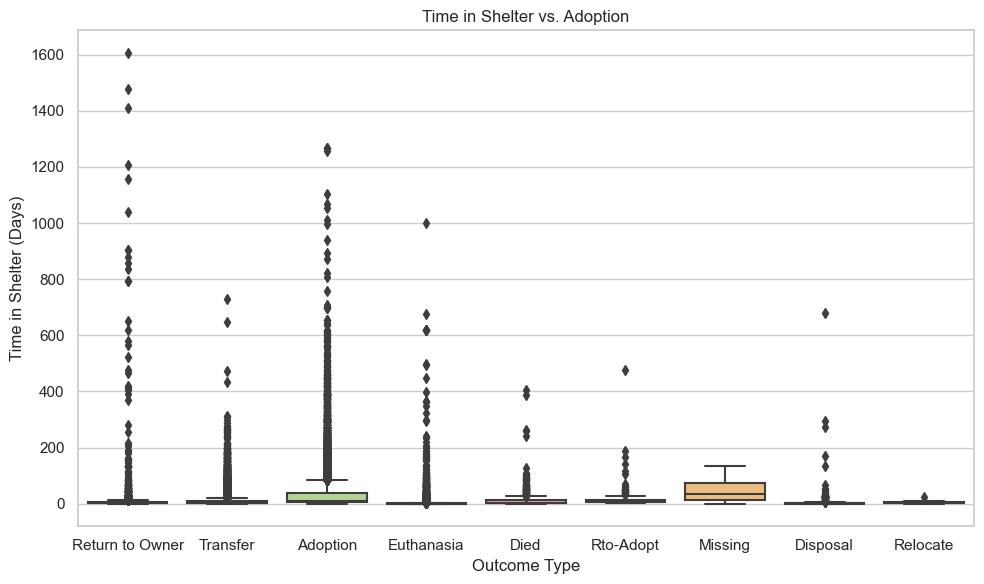

In [113]:
# 5. Relationship between time in shelter and adoption
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome_type', y='time_in_shelter_days', data=data, palette="Paired")
plt.title('Time in Shelter vs. Adoption')
plt.xlabel('Outcome Type')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()

### Time in shelter does not seems to affect the outcome type

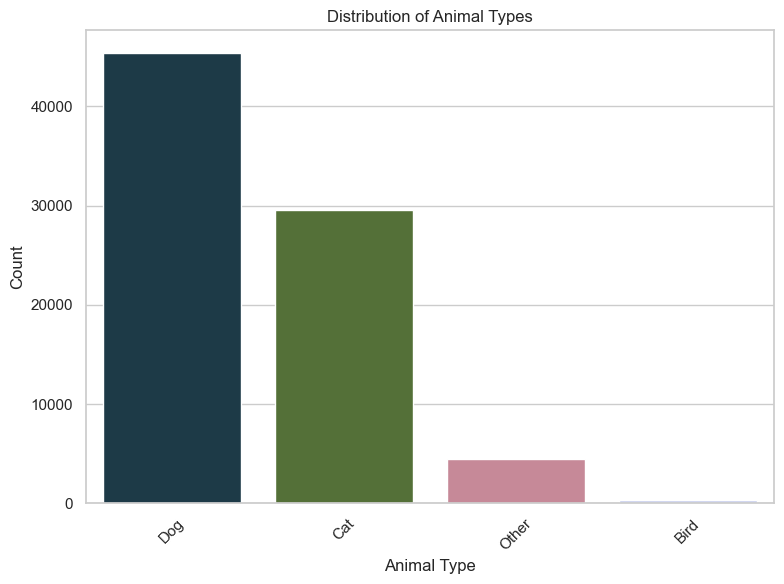

In [114]:
# 6. Distribution of animal types
plt.figure(figsize=(8, 6))
animal_type_distribution = data['animal_type'].value_counts()
sns.barplot(x=animal_type_distribution.index, y=animal_type_distribution.values, palette="cubehelix")
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

### Cat and Dog has much higher count in the dataset which is not surprising.

<Figure size 1000x1000 with 0 Axes>

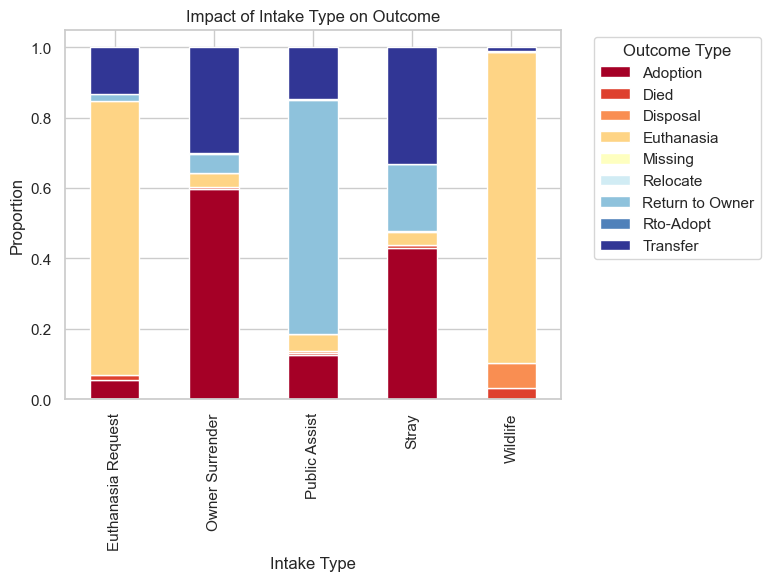

In [185]:
# 7. Impact of intake type on outcome
plt.figure(figsize=(10, 10))
intake_vs_outcome = data.groupby('intake_type')['outcome_type'].value_counts(normalize=True).unstack()
intake_vs_outcome.plot(kind='bar', stacked=True, colormap='RdYlBu')
plt.title('Impact of Intake Type on Outcome')
plt.xlabel('Intake Type')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()

### Intake type feature certainly has an effects on outcome type.
- This feature can be highly use full for modelling or prediction

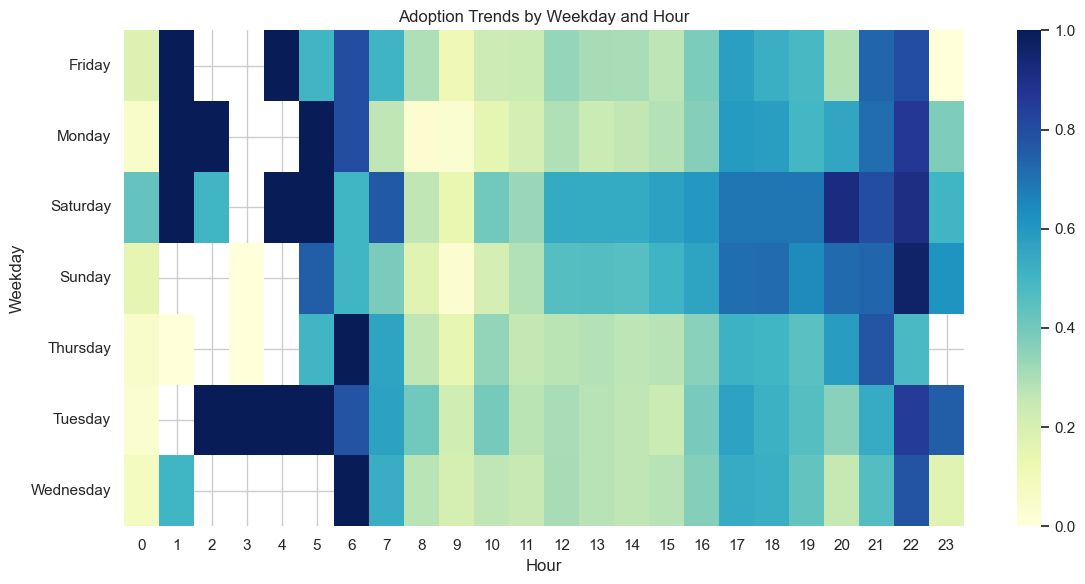

In [118]:
# 8. Adoption trends by weekday and hour
plt.figure(figsize=(12, 6))
adoption_time_trends = data.groupby(['outcome_weekday', 'outcome_hour'])['outcome_type'].value_counts(normalize=True).unstack()
adoption_time_trends = adoption_time_trends.fillna(0)  # Fill NaN values with 0 for plotting
sns.heatmap(adoption_time_trends['Adoption'].unstack(), cmap='YlGnBu')
plt.title('Adoption Trends by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.tight_layout()


### For some reason, at the start and end to week and month has higher adoption rate. 

<Figure size 1200x600 with 0 Axes>

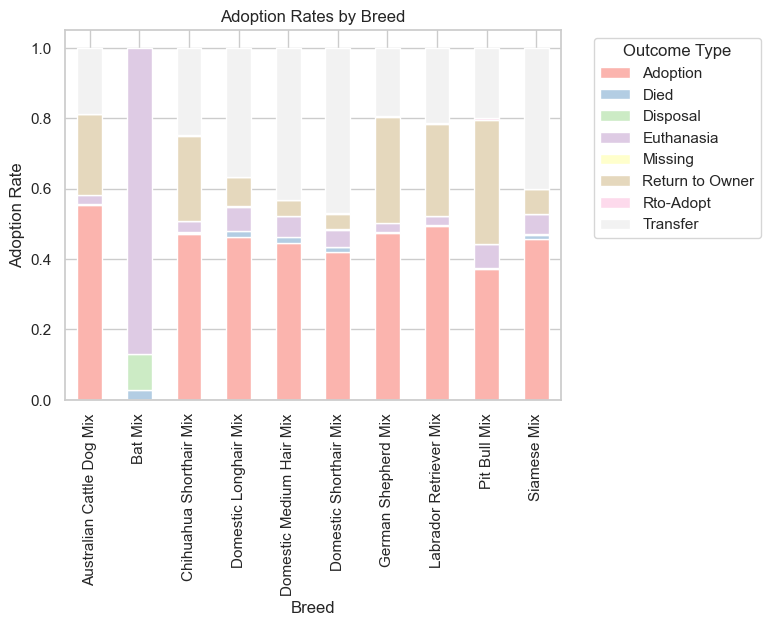

In [134]:
# 9. Adoption rates by breed
plt.figure(figsize=(12, 6))
top_breeds = data['breed'].value_counts().head(10)
adoption_by_breed = data[data['breed'].isin(top_breeds.index)].groupby('breed')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_breed.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Adoption Rates by Breed')
plt.xlabel('Breed')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Breed does not seems to affect the adoption rate except BatMix type.

<Figure size 1200x600 with 0 Axes>

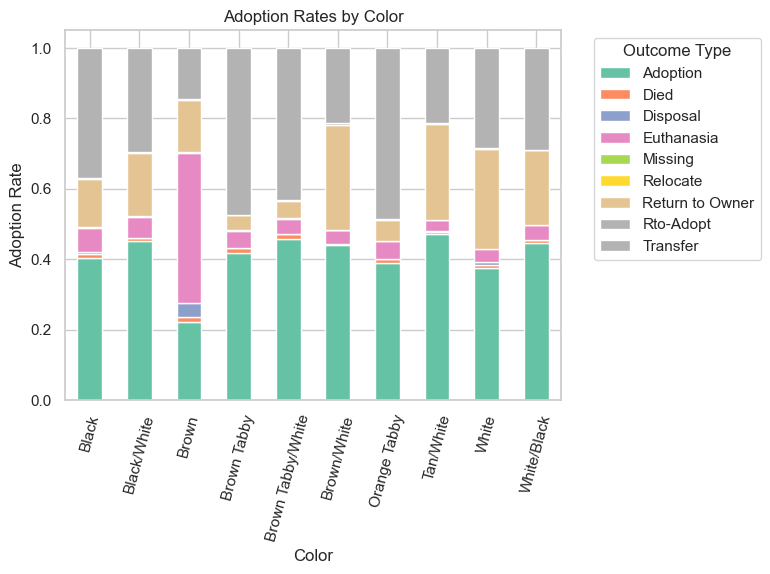

In [135]:
# 10. Adoption rates by color
plt.figure(figsize=(12, 6))
top_colors = data['color'].value_counts().head(10)
adoption_by_color = data[data['color'].isin(top_colors.index)].groupby('color')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_color.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Adoption Rates by Color')
plt.xlabel('Color')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=75)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Similar to breed, colour also does seems to affect the outcome.

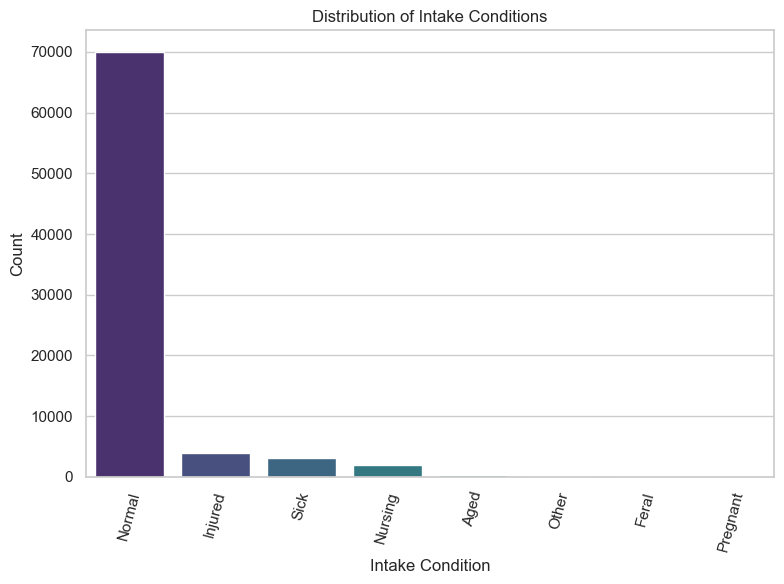

In [136]:
# 11. Distribution of intake conditions
plt.figure(figsize=(8, 6))
intake_condition_distribution = data['intake_condition'].value_counts()
sns.barplot(x=intake_condition_distribution.index, y=intake_condition_distribution.values, palette="viridis")
plt.title('Distribution of Intake Conditions')
plt.xlabel('Intake Condition')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()


### Most animal are in normal intake condition. :)

<Figure size 800x600 with 0 Axes>

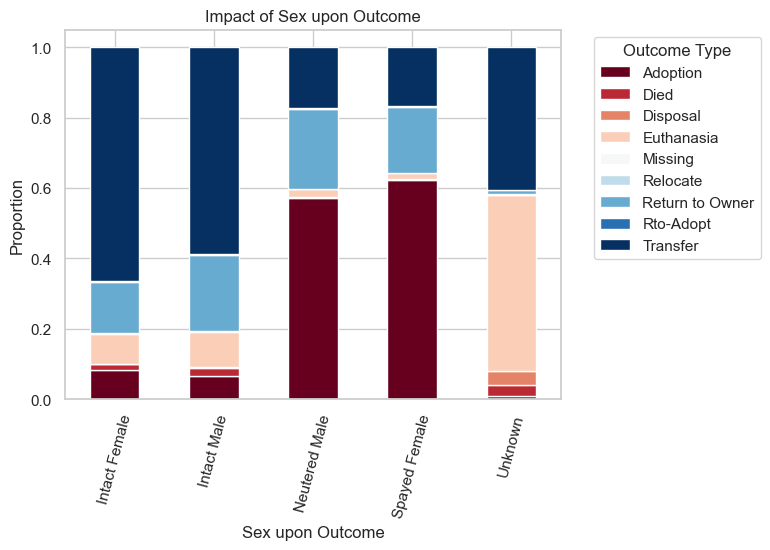

In [137]:
# 12. Impact of sex upon outcome
plt.figure(figsize=(8, 6))
sex_vs_outcome = data.groupby('sex_upon_outcome')['outcome_type'].value_counts(normalize=True).unstack()
sex_vs_outcome.plot(kind='bar', stacked=True, colormap='RdBu')
plt.title('Impact of Sex upon Outcome')
plt.xlabel('Sex upon Outcome')
plt.ylabel('Proportion')
plt.xticks(rotation=75)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Surprisingly, Intact female and male are not the most adoption sex in the dataset. 

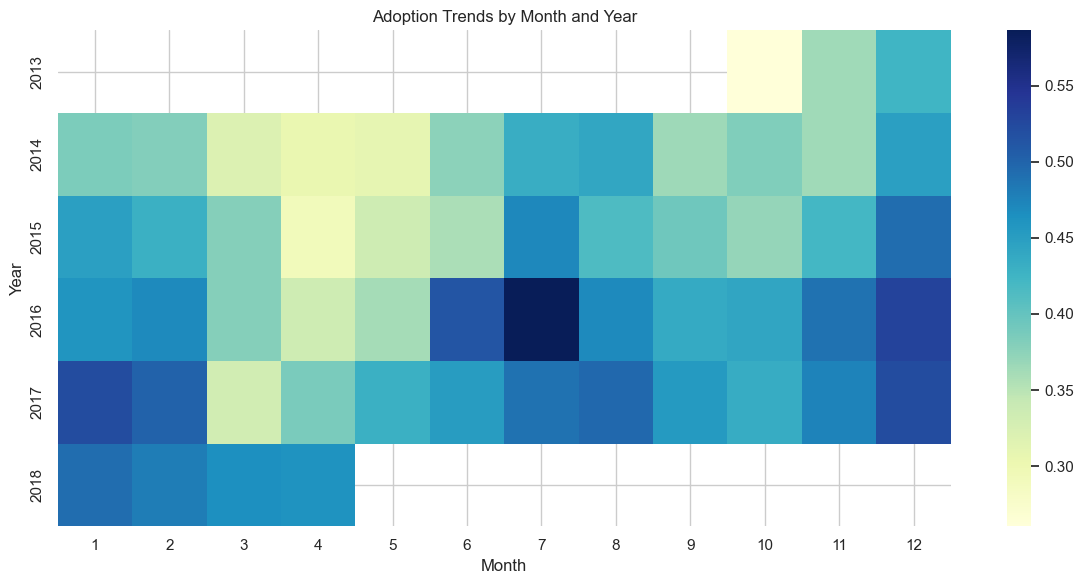

In [129]:
# 13. Adoption trends by month and year
plt.figure(figsize=(12, 6))
adoption_time_month_year = data.groupby(['outcome_year', 'outcome_month'])['outcome_type'].value_counts(normalize=True).unstack()
sns.heatmap(adoption_time_month_year['Adoption'].unstack(), cmap='YlGnBu')
plt.title('Adoption Trends by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()

<Figure size 800x600 with 0 Axes>

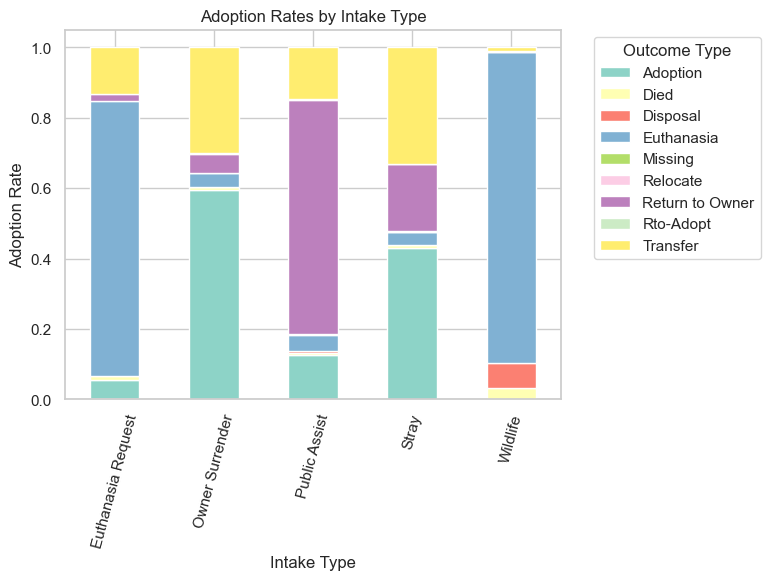

In [138]:
# 14. Adoption rates by intake type
plt.figure(figsize=(8, 6))
adoption_by_intake_type = data.groupby('intake_type')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_intake_type.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Adoption Rates by Intake Type')
plt.xlabel('Intake Type')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=75)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Adotion Rate is highly influenced by owner surrender and stray category.

<Figure size 1200x600 with 0 Axes>

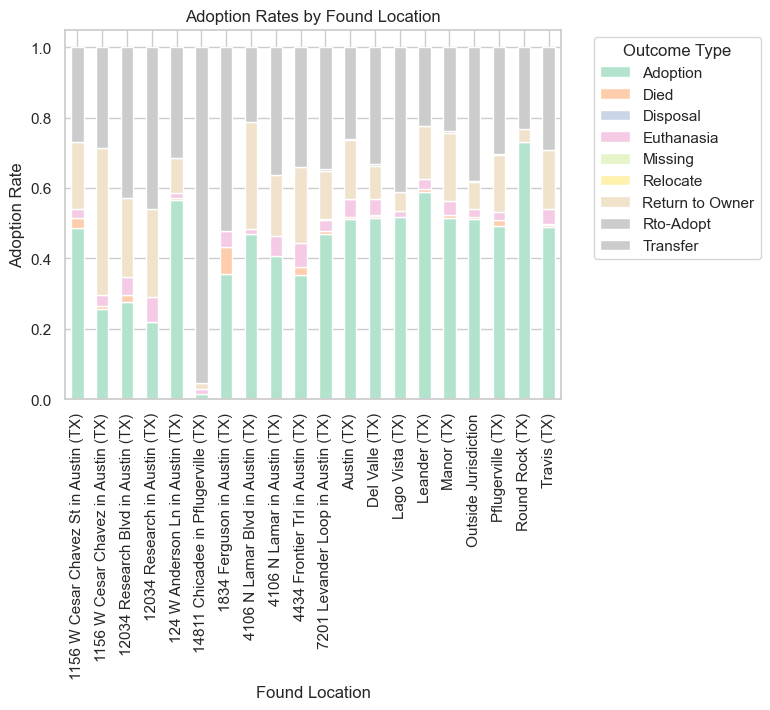

In [189]:
# 15. Adoption rates by found location
plt.figure(figsize=(12, 6))
top_found_locations = data['found_location'].value_counts().head(20)
adoption_by_found_location = data[data['found_location'].isin(top_found_locations.index)].groupby('found_location')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_found_location.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Adoption Rates by Found Location')
plt.xlabel('Found Location')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Found location does seems to have an affect on outcome rates except one location.

<Figure size 1000x600 with 0 Axes>

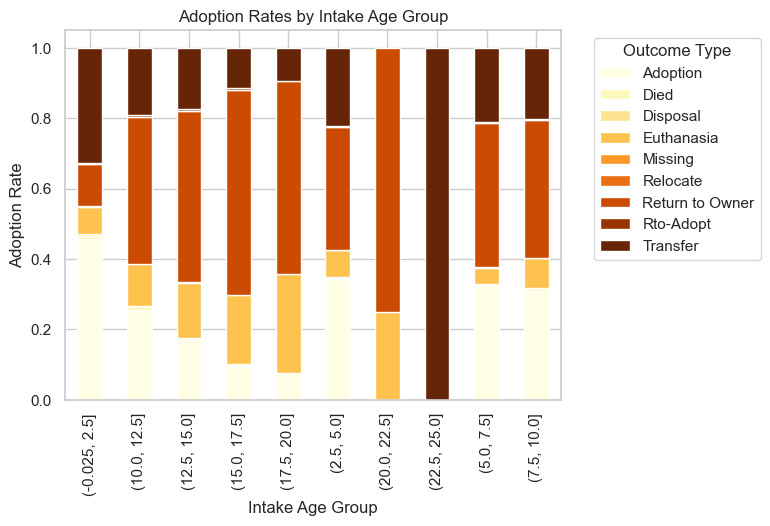

In [143]:
# 16. Adoption rates by intake age group
plt.figure(figsize=(10, 6))
adoption_by_intake_age_group = data.groupby('age_upon_intake_age_group')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_intake_age_group.plot(kind='bar', stacked=True, colormap='YlOrBr')
plt.title('Adoption Rates by Intake Age Group')
plt.xlabel('Intake Age Group')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Intake age group also affect the adoption rate especially for lower and higher age group.

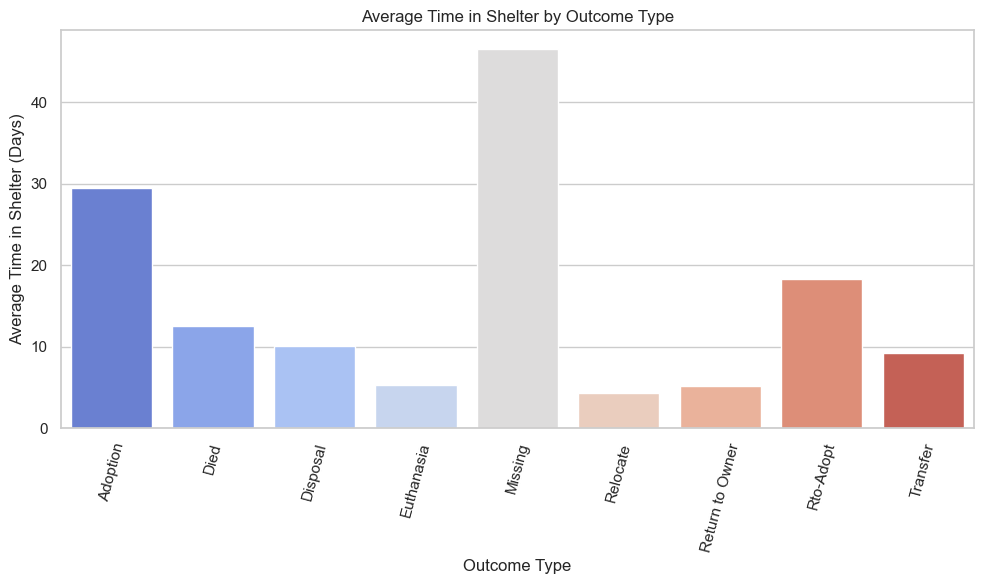

In [144]:
# 17. Average time in shelter for different outcome types
plt.figure(figsize=(10, 6))
avg_time_in_shelter_by_outcome = data.groupby('outcome_type')['time_in_shelter_days'].mean()
sns.barplot(x=avg_time_in_shelter_by_outcome.index, y=avg_time_in_shelter_by_outcome.values, palette="coolwarm")
plt.title('Average Time in Shelter by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Average Time in Shelter (Days)')
plt.xticks(rotation=75)
plt.tight_layout()

### Average time is shelter affect the adotion rate positively.

<Figure size 1200x600 with 0 Axes>

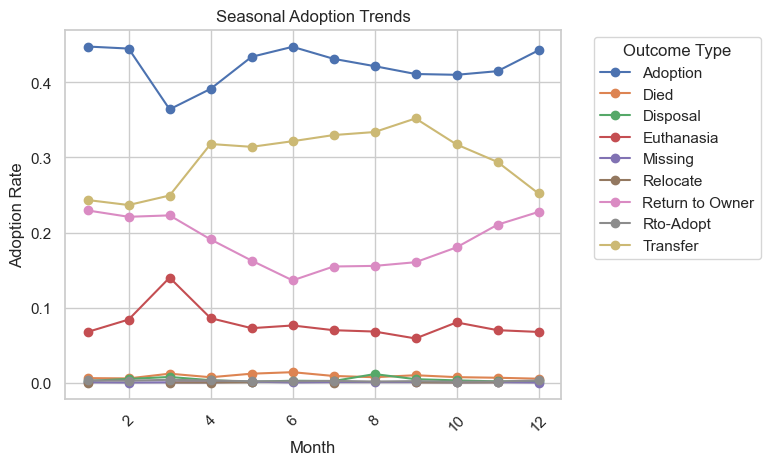

In [146]:
# 18. Seasonal adoption trends
plt.figure(figsize=(12, 6))
seasonal_adoption_trends = data.groupby('intake_month')['outcome_type'].value_counts(normalize=True).unstack()
seasonal_adoption_trends.plot(kind='line', marker='o')
plt.title('Seasonal Adoption Trends')
plt.xlabel('Month')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 800x600 with 0 Axes>

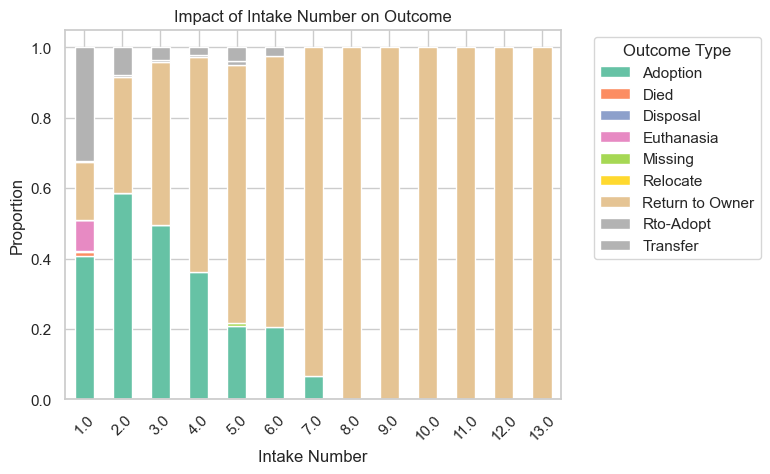

In [148]:
# 19. Impact of intake number on adoption
plt.figure(figsize=(8, 6))
intake_number_vs_outcome = data.groupby('intake_number')['outcome_type'].value_counts(normalize=True).unstack()
intake_number_vs_outcome.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Impact of Intake Number on Outcome')
plt.xlabel('Intake Number')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 800x600 with 0 Axes>

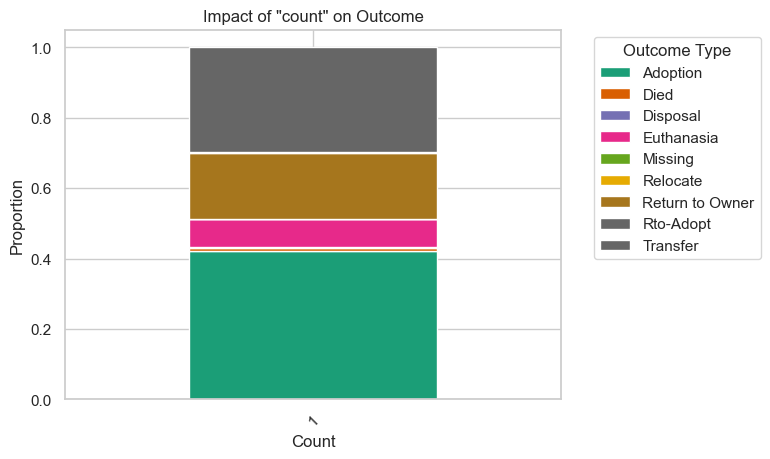

In [150]:
# 20. Impact of "count" (number of animals with the same ID) on adoption
plt.figure(figsize=(8, 6))
count_vs_outcome = data.groupby('count')['outcome_type'].value_counts(normalize=True).unstack()
count_vs_outcome.plot(kind='bar', stacked=True, colormap='Dark2')
plt.title('Impact of "count" on Outcome')
plt.xlabel('Count')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

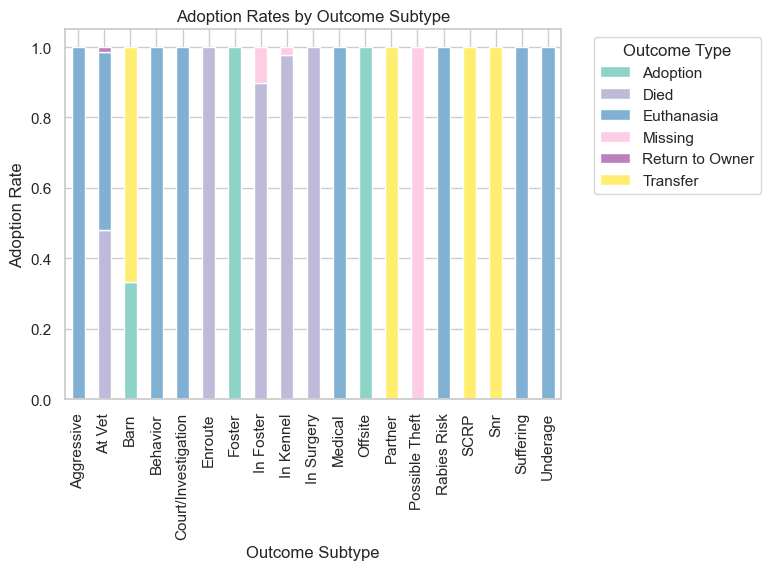

In [155]:
# 21. Adoption rates by outcome subtype
plt.figure(figsize=(12, 6))
adoption_by_subtype = data.groupby('outcome_subtype')['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_subtype.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Adoption Rates by Outcome Subtype')
plt.xlabel('Outcome Subtype')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

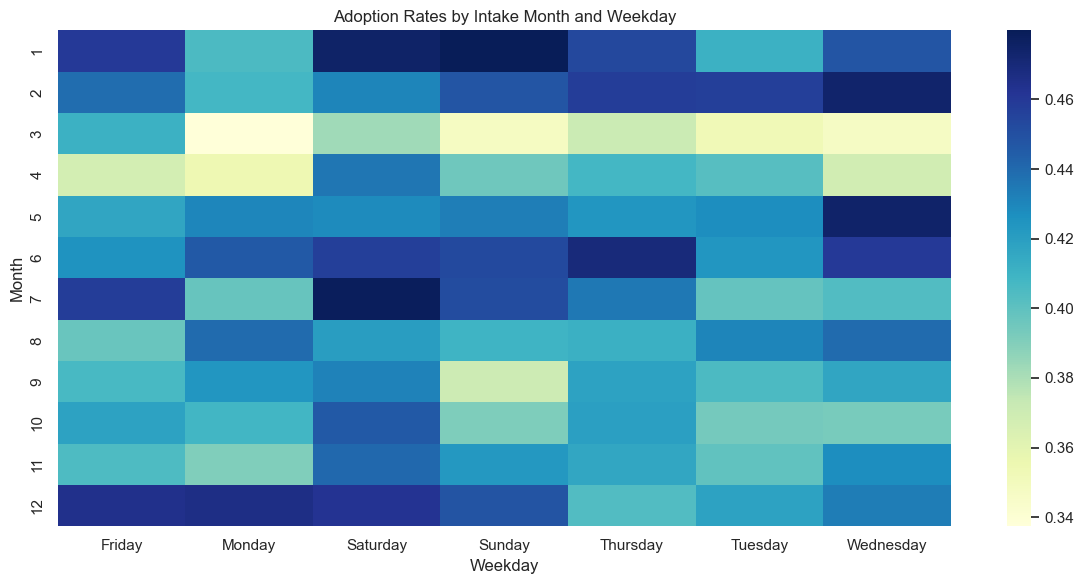

In [156]:
# 22. Adoption rates by intake month and weekday
plt.figure(figsize=(12, 6))
adoption_by_intake_time = data.groupby(['intake_month', 'intake_weekday'])['outcome_type'].value_counts(normalize=True).unstack()
sns.heatmap(adoption_by_intake_time['Adoption'].unstack(), cmap='YlGnBu')
plt.title('Adoption Rates by Intake Month and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.tight_layout()

<Figure size 1500x1500 with 0 Axes>

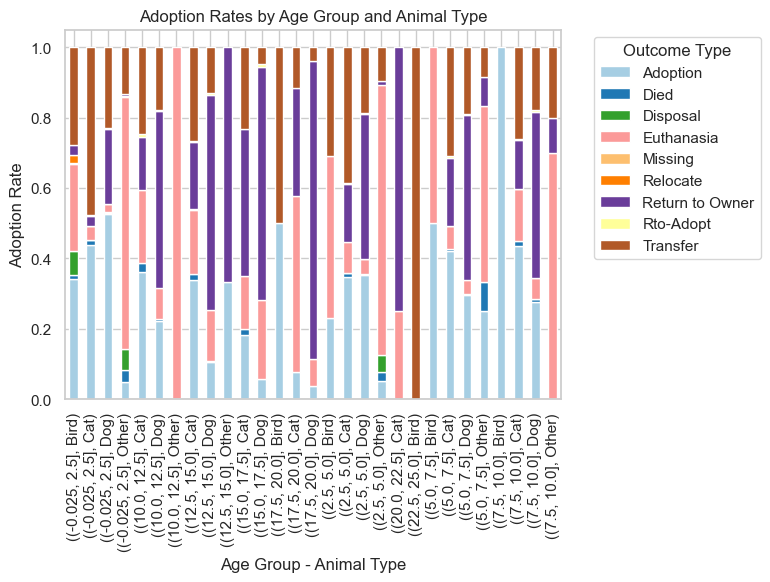

In [191]:
# 23. Adoption rates by age and animal type
plt.figure(figsize=(15, 15))
adoption_by_age_animal_type = data.groupby(['age_upon_outcome_age_group', 'animal_type'])['outcome_type'].value_counts(normalize=True).unstack()
adoption_by_age_animal_type.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Adoption Rates by Age Group and Animal Type')
plt.xlabel('Age Group - Animal Type')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=90)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Animal type and age group shows a correlation with Adoption rate. 
- Can be a useful feature in modelling if feature engineering is used.

<Figure size 1200x600 with 0 Axes>

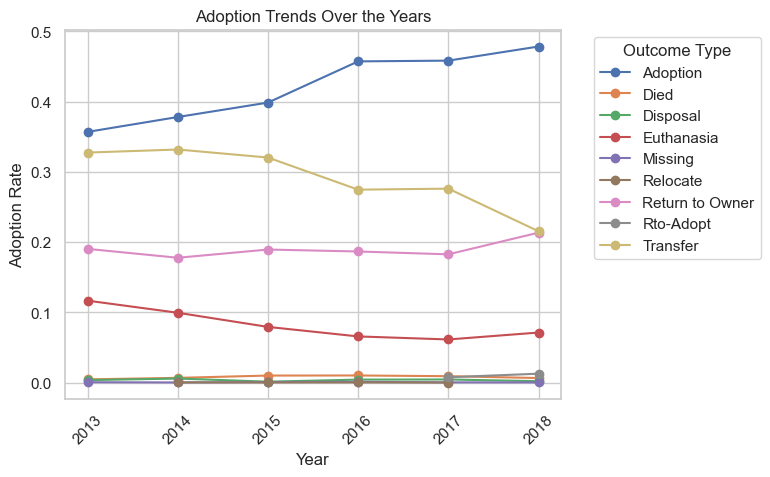

In [161]:
# 24. Adoption trends over the years
plt.figure(figsize=(12, 6))
adoption_over_years = data.groupby('outcome_year')['outcome_type'].value_counts(normalize=True).unstack()
adoption_over_years.plot(kind='line', marker='o')
plt.title('Adoption Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

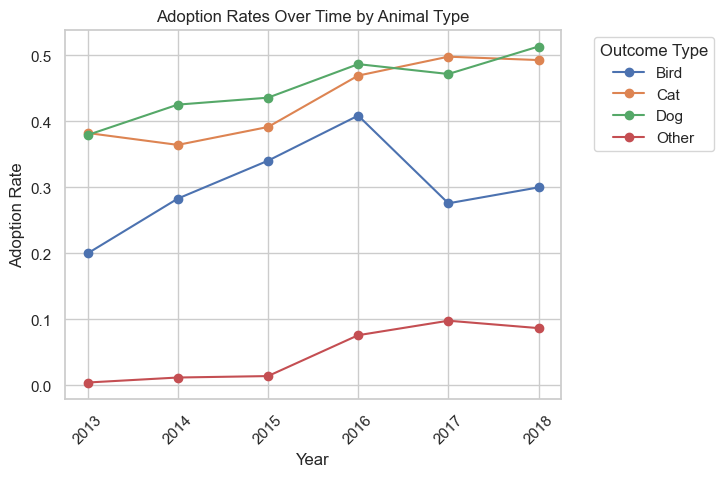

In [186]:
# Adoption Rates Over Time by Animal Type:
plt.figure(figsize=(12, 6))
adoption_over_time_animal_type = data.groupby(['outcome_year', 'animal_type'])['outcome_type'].value_counts(normalize=True).unstack()
adoption_over_time_animal_type['Adoption'].unstack().plot(kind='line', marker='o')
plt.title('Adoption Rates Over Time by Animal Type')
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.legend(title='Animal Type')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

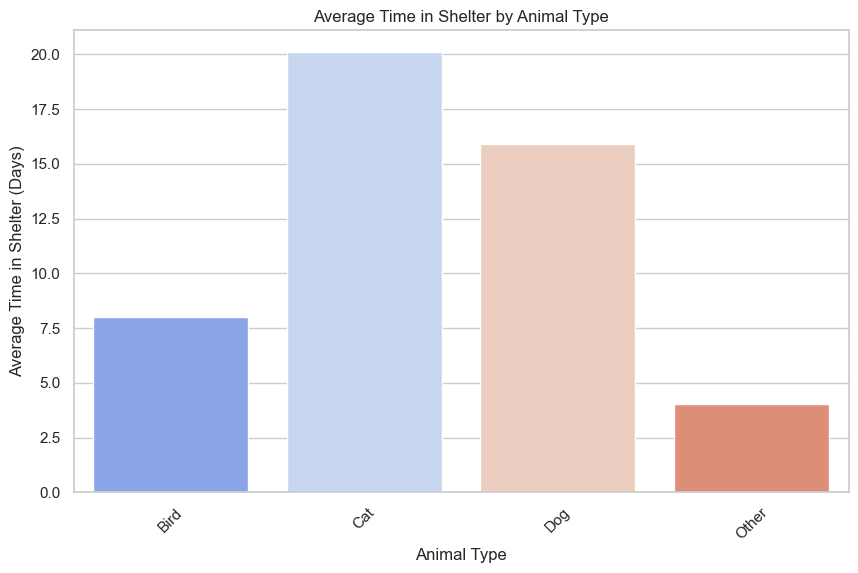

In [163]:
# 25. Average time in shelter by animal type
plt.figure(figsize=(10, 6))
avg_time_in_shelter_by_type = data.groupby('animal_type')['time_in_shelter_days'].mean()
sns.barplot(x=avg_time_in_shelter_by_type.index, y=avg_time_in_shelter_by_type.values, palette='coolwarm')
plt.title('Average Time in Shelter by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Average Time in Shelter (Days)')
plt.xticks(rotation=45)
plt.show()

### Dog and Cat have spent more time in shalter which is normal as most animal falls under these category.

# Correlation among features and outcomes

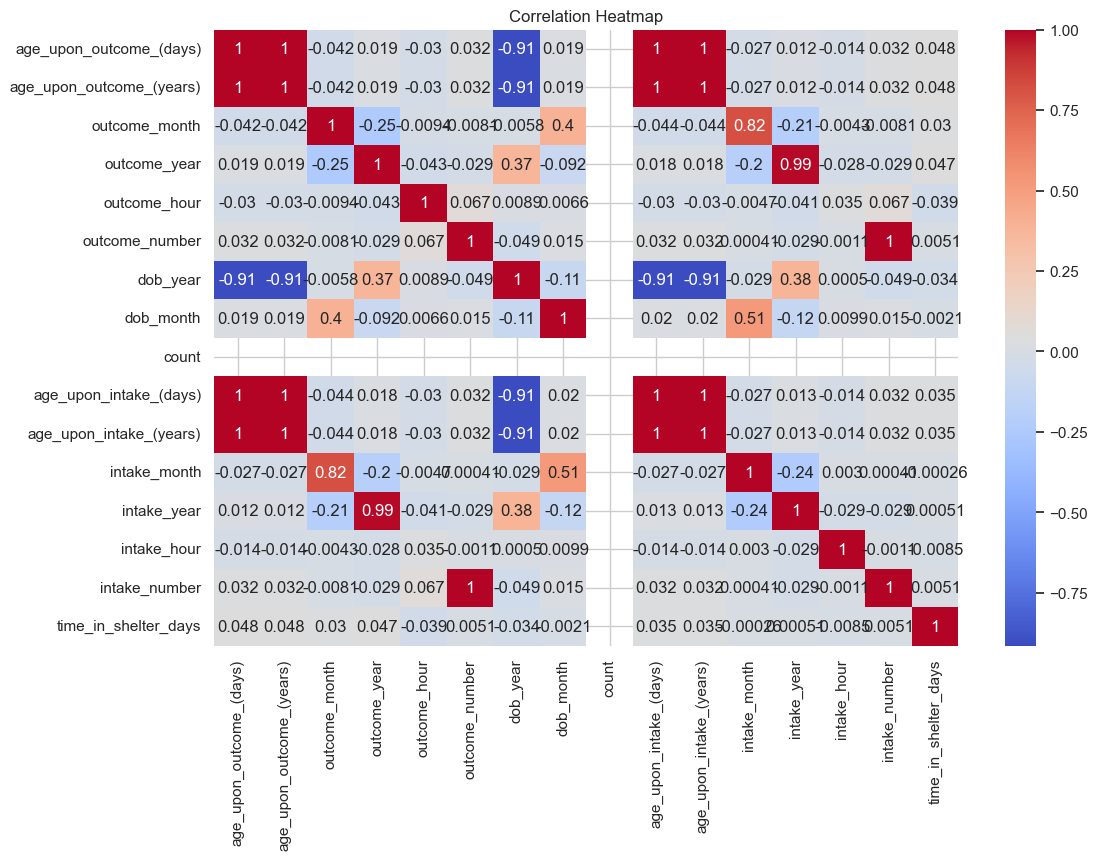

In [182]:
# 26. Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

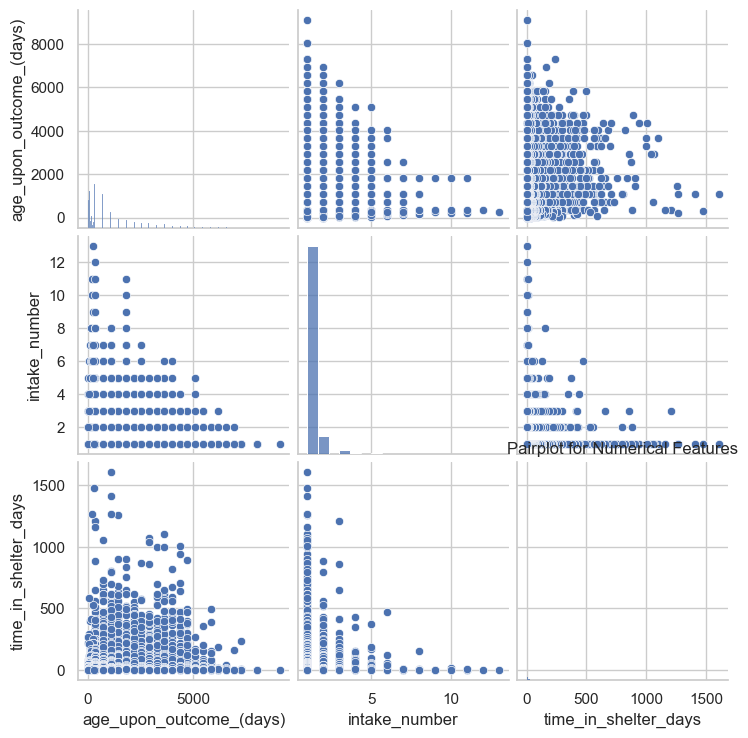

In [192]:
# 27. Pairplot for selected numerical features
num_features = ['age_upon_outcome_(days)', 'intake_number', 'time_in_shelter_days']
sns.pairplot(data[num_features])
plt.title('Pairplot for Numerical Features')
plt.show()

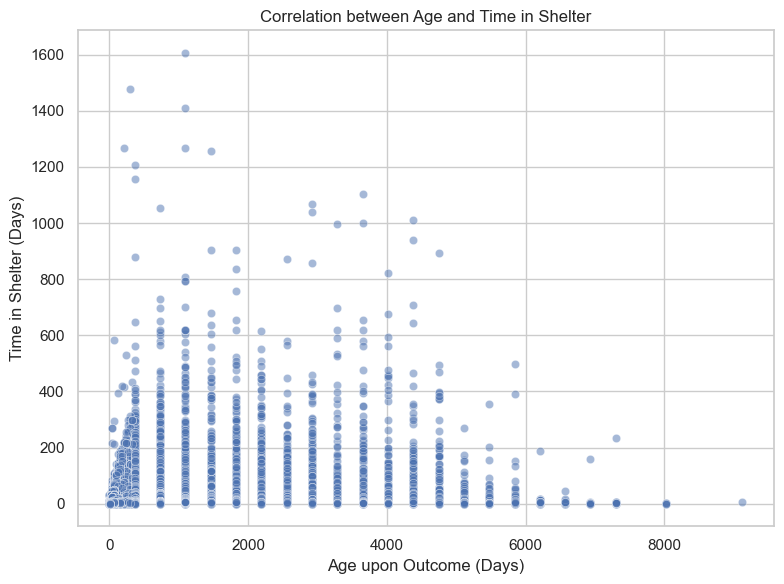

In [168]:
# 28. Correlation between age and time in shelter
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age_upon_outcome_(days)', y='time_in_shelter_days', data=data, alpha=0.5)
plt.title('Correlation between Age and Time in Shelter')
plt.xlabel('Age upon Outcome (Days)')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()

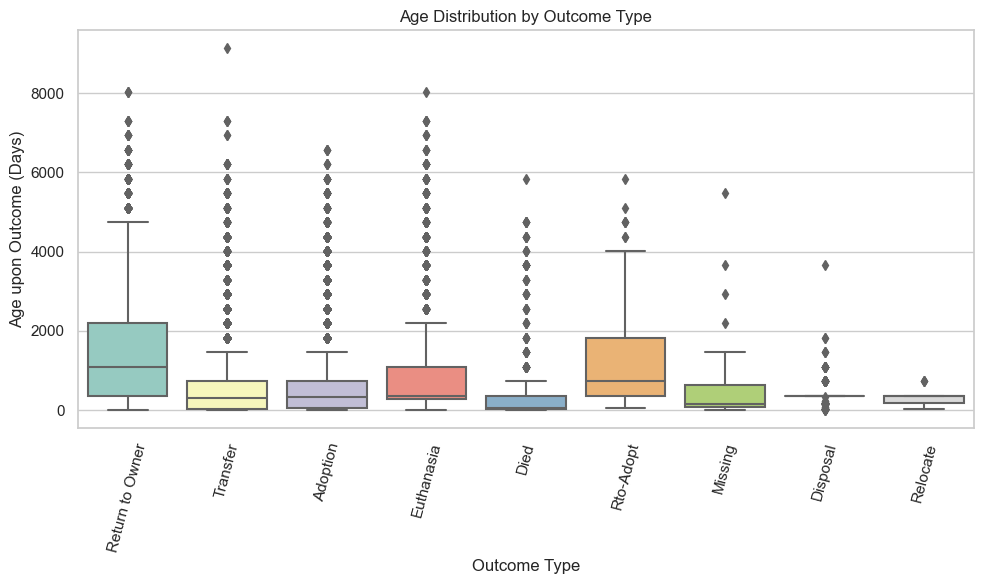

In [187]:
# 29. Boxplot of age by outcome type
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome_type', y='age_upon_outcome_(days)', data=data, palette='Set3')
plt.title('Age Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Age upon Outcome (Days)')
plt.xticks(rotation=75)
plt.tight_layout()

/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/sau

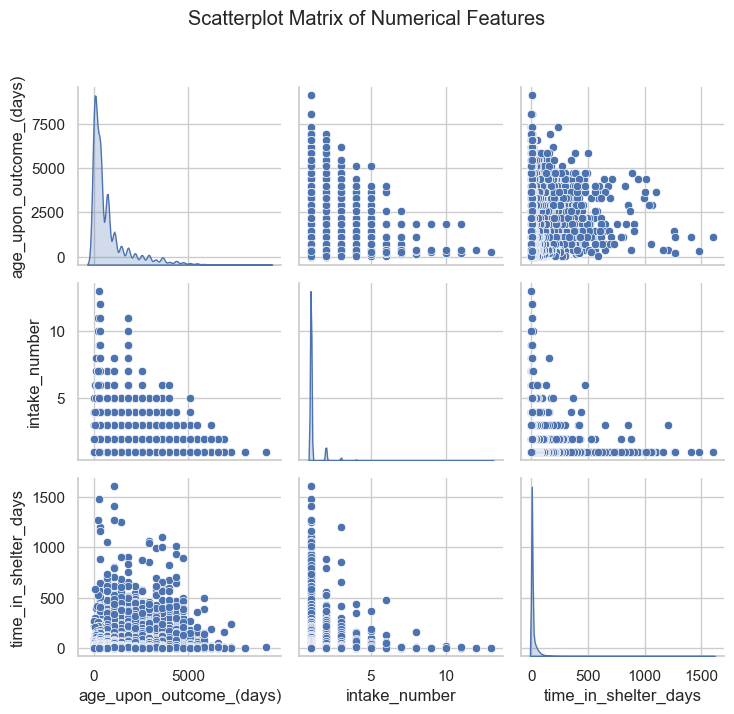

In [171]:
# 30. Scatterplot matrix for numerical features
num_features = ['age_upon_outcome_(days)', 'intake_number', 'time_in_shelter_days']
sns.pairplot(data[num_features], kind='scatter', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

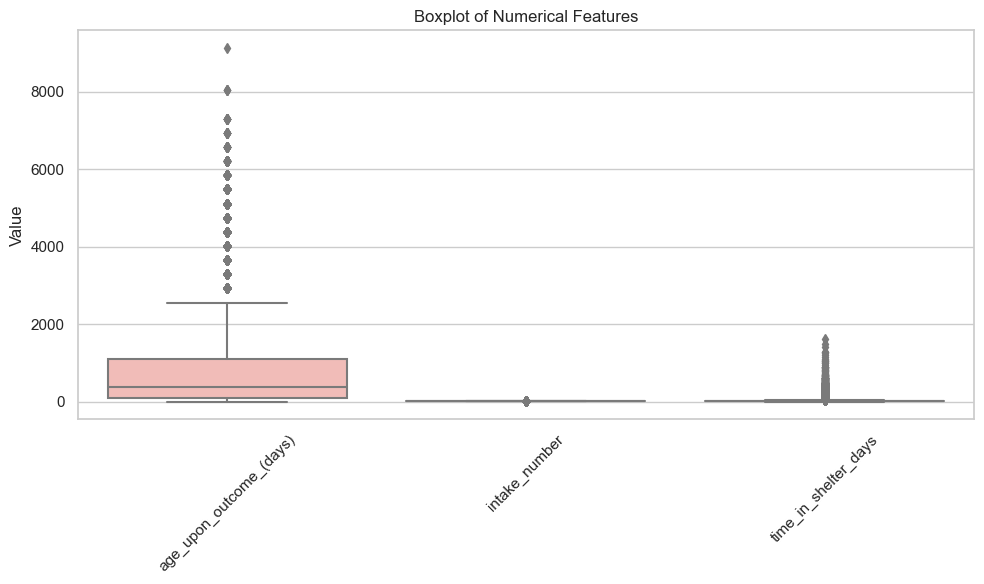

In [172]:
# 31. Boxplot for numerical features
plt.figure(figsize=(10, 6))
num_features = ['age_upon_outcome_(days)', 'intake_number', 'time_in_shelter_days']
sns.boxplot(data=data[num_features], palette='Pastel1')
plt.title('Boxplot of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

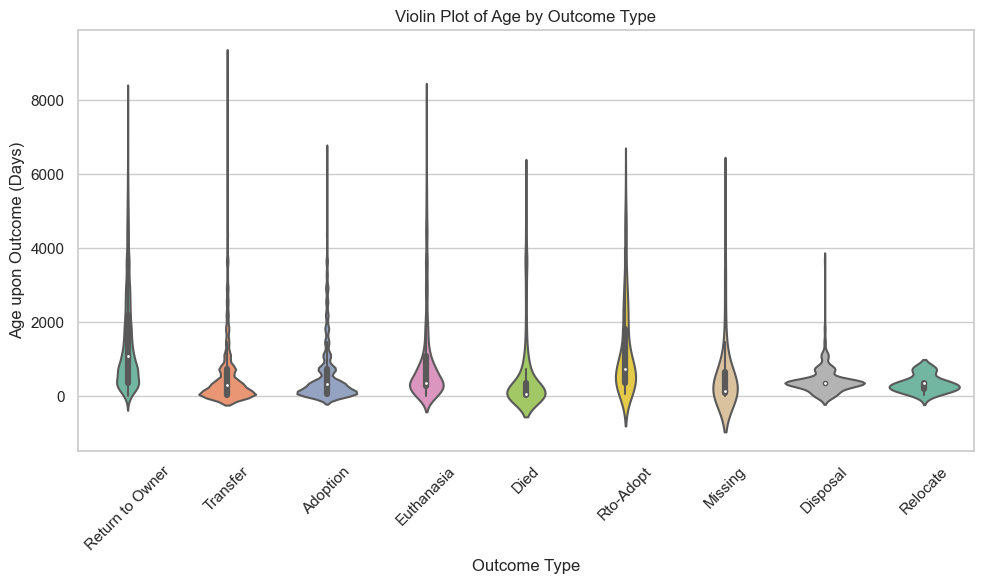

In [173]:
# 32. Violin plot for age by outcome type
plt.figure(figsize=(10, 6))
sns.violinplot(x='outcome_type', y='age_upon_outcome_(days)', data=data, palette='Set2')
plt.title('Violin Plot of Age by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Age upon Outcome (Days)')
plt.xticks(rotation=45)
plt.tight_layout()

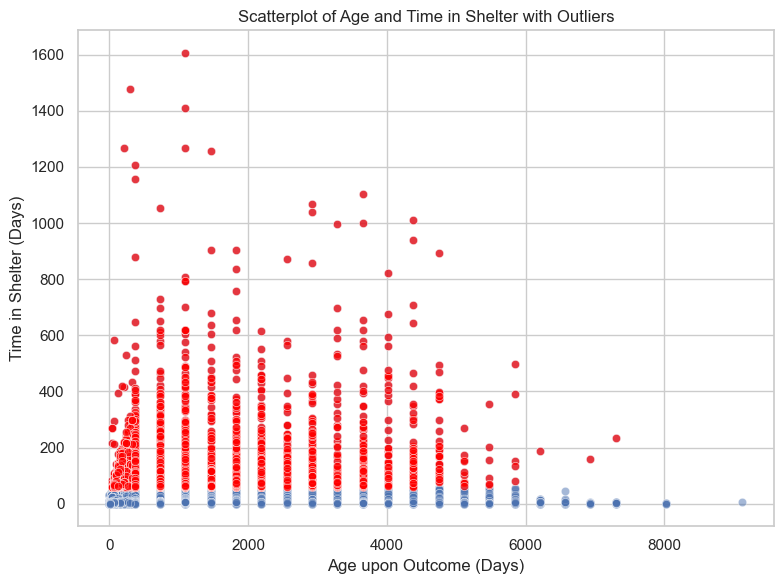

In [174]:
# 33. Scatterplot for age and time in shelter with outliers highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age_upon_outcome_(days)', y='time_in_shelter_days', data=data, alpha=0.5)
sns.scatterplot(x='age_upon_outcome_(days)', y='time_in_shelter_days', data=data[data['time_in_shelter_days'] > 60], color='red', alpha=0.7)
plt.title('Scatterplot of Age and Time in Shelter with Outliers')
plt.xlabel('Age upon Outcome (Days)')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()

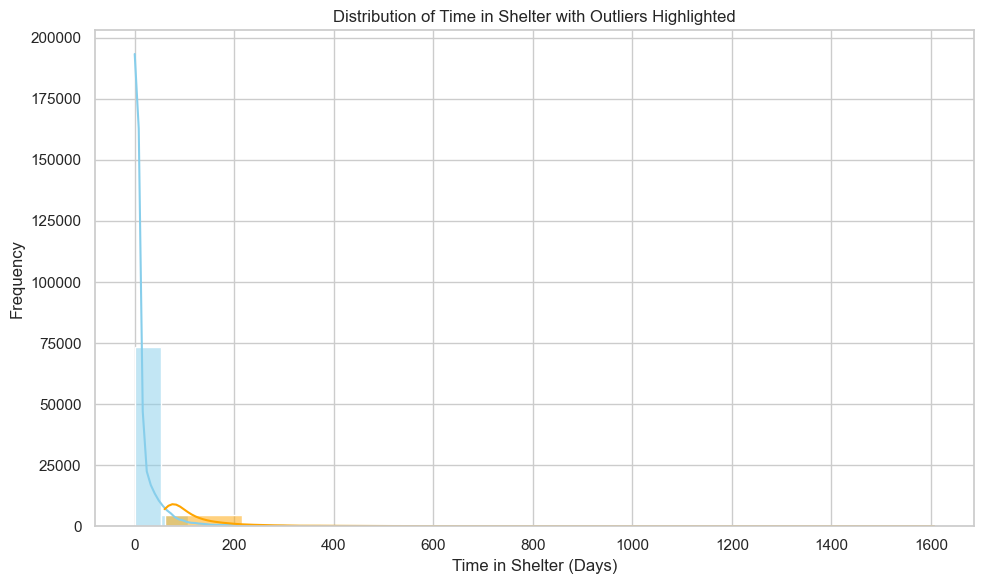

In [175]:
# 34. Distribution of time in shelter with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(data['time_in_shelter_days'], bins=30, kde=True, color='skyblue')
sns.histplot(data['time_in_shelter_days'][data['time_in_shelter_days'] > 60], bins=10, kde=True, color='orange')
plt.title('Distribution of Time in Shelter with Outliers Highlighted')
plt.xlabel('Time in Shelter (Days)')
plt.ylabel('Frequency')
plt.tight_layout()

/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/saurabhbhardwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/sau

<Figure size 1200x800 with 0 Axes>

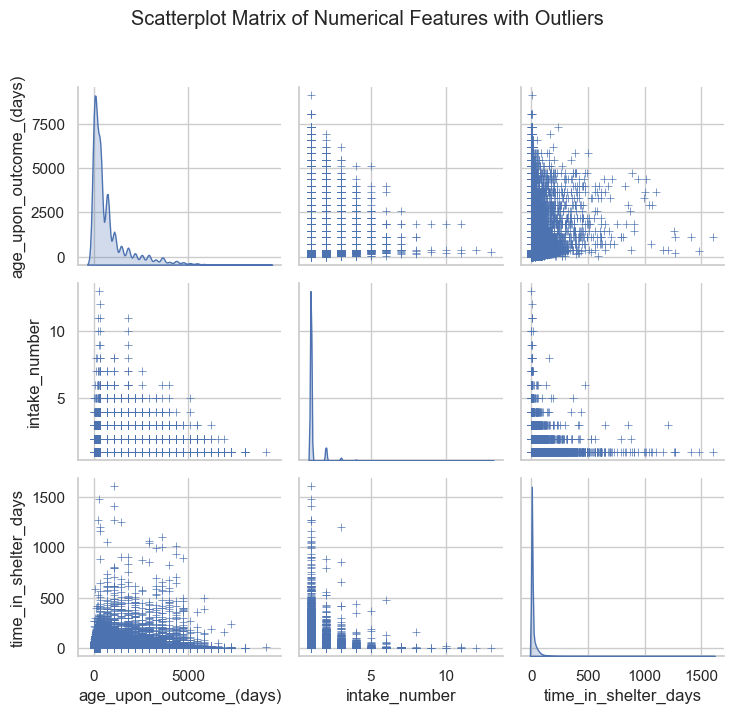

In [176]:
# 35. Scatterplot matrix for numerical features with outliers
plt.figure(figsize=(12, 8))
num_features = ['age_upon_outcome_(days)', 'intake_number', 'time_in_shelter_days']
sns.pairplot(data[num_features], kind='scatter', diag_kind='kde', markers="+", palette='Dark2')
plt.suptitle('Scatterplot Matrix of Numerical Features with Outliers')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### There are highly correlated features present in the dataset. Main findings are below

Columns age_upon_outcome, age_upon_outcome_(days) and age_upon_outcome_(years) contain the same information hence are consided duplicates. Similarly, Columns age_upon_intake, age_upon_intake_(days), age_upon_intake_(years) provide the duplicate informatation:


Columns age_upon_outcome_age_group and age_upon_intake_age_group have 10 different age groups as followings.
(-0.025, 2.5) (2.5, 5.0) (5.0, 7.5) (7.5, 10.0) (10.0, 12.5) (12.5, 15.0) (15.0, 17.5) (17.5, 20.0) (20.0, 22.5) (22.5, 25.0)


Column outcome_subtype has 54.4% missing values. We should not impute these values using traditional fillna methods otherwise output might not be reliable.


Columns outcome_type, sex_upon_outcome and sex_upon_intake have 10, 1, and 1 missing values respectively.


Columns dob_year, dob_month, dob_monthyear provide information about the date of birth, which is already captured by the date_of_birth column.


Columns intake_datetime, intake_month, intake_year, intake_monthyear, intake_weekday, and intake_hour provide the same information.

Columns outcome_datetime, outcome_month, outcome_year, outcome_monthyear, outcome_weekday, and outcome_hour also provide the same information.

Column time_in_shelter provides the same information as time_in_shelter_days column.

Columns animal_id_outcome and animal_id_intake should not be a feature for modelling as it is just an id assigned to the animal. Similarly, count column contain only one value hence provides no useful information for modelling.


